# Data exploration - Sea Level 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The dataset is an excel file with 6 sheets with 6 coresponding factors: Land, Population, GDP, Agriculture, Urban Extent, and Wetland affected by Sea Level Rise (SLR), from [The World Bank](https://datacatalog.worldbank.org/dataset/world-sea-level-rise-dataset) (download [here](https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/172666/slr-impacts_nov2010.xls))

In [2]:
df_all_sheets = pd.read_excel('slr-impacts_nov2010.xls', skiprows = 6, sheet_name = None)
df1 = df_all_sheets['Land']
df2 = df_all_sheets['Population']
df3 = df_all_sheets['GDP']
df4 = df_all_sheets['Agriculture']
df5 = df_all_sheets['UrbanExtent']
df6 = df_all_sheets['Wetland']

## 1. Land

All 6 sheets have a same format, let's explore the first one (Land) in detail and apply same operations to the others.

In [3]:
df1.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Global,64334381.0,220703.0,332720.0,478682.0,639442.0,802895.0,0.343056,0.517173,0.744053,0.993935,1.248003
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Latin America / Caribbean,18806598.0,67188.0,104507.0,152210.0,197104.0,237795.0,0.357258,0.555693,0.809344,1.048058,1.264423
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARG,Argentina,2736391.0,9083.0,14331.0,20131.0,25362.0,30806.0,0.331934,0.523719,0.735677,0.926841,1.125789
5,BHS,Bahamas,13162.0,1523.0,2507.0,4080.0,6165.0,8146.0,11.571190,19.047257,30.998329,46.839386,61.890290
6,BLZ,Belize,22290.0,424.0,752.0,1089.0,1396.0,1703.0,1.902198,3.373710,4.885599,6.262898,7.640197
7,BRA,Brazil,8480395.0,11456.0,20673.0,34564.0,43970.0,51162.0,0.135088,0.243774,0.407575,0.518490,0.603297
8,CHL,Chile,721229.0,7266.0,9280.0,11249.0,12923.0,12923.0,1.007447,1.286693,1.559699,1.791803,1.791803
9,COL,Colombia,1141569.0,2405.0,3642.0,5335.0,7255.0,9124.0,0.210675,0.319035,0.467339,0.635529,0.799251


Columns of the dataframe is described below:
    #1: Country code
    #2: Country name
    #3: Country Area (km^2)
    #4 - 8: Numerical figures of an impacted factor when SLR 1m, 2m, 3m, 4m, or 5m
    #9 - 13: Percentage of a factor impacted when SLR 1m, 2m, 3m, 4m, or 5m

In [4]:
df1.columns = ['CC', 'CN', 'CA', 'NA_1m', 'NA_2m', 'NA_3m', 'NA_4m', 'NA_5m', '%A_1m', '%A_2m', '%A_3m', '%A_4m', '%A_5m']
df1.dropna(how = 'all', inplace = True)
df1 = df1.reset_index(drop = True)
df1.index += 1
df1 = df1.astype(dict.fromkeys(['CA', 'NA_1m', 'NA_2m', 'NA_3m', 'NA_4m', 'NA_5m'], int))
df1.head(10)

,CC,CN,CA,NA_1m,NA_2m,NA_3m,NA_4m,NA_5m,%A_1m,%A_2m,%A_3m,%A_4m,%A_5m
1,NaN,Global,64334381,220703,332720,478682,639442,802895,0.343056,0.517173,0.744053,0.993935,1.248003
2,NaN,Latin America / Caribbean,18806598,67188,104507,152210,197104,237795,0.357258,0.555693,0.809344,1.048058,1.264423
3,ARG,Argentina,2736391,9083,14331,20131,25362,30806,0.331934,0.523719,0.735677,0.926841,1.125789
4,BHS,Bahamas,13162,1523,2507,4080,6165,8146,11.571190,19.047257,30.998329,46.839386,61.890290
5,BLZ,Belize,22290,424,752,1089,1396,1703,1.902198,3.373710,4.885599,6.262898,7.640197
6,BRA,Brazil,8480395,11456,20673,34564,43970,51162,0.135088,0.243774,0.407575,0.518490,0.603297
7,CHL,Chile,721229,7266,9280,11249,12923,12923,1.007447,1.286693,1.559699,1.791803,1.791803
8,COL,Colombia,1141569,2405,3642,5335,7255,9124,0.210675,0.319035,0.467339,0.635529,0.799251
9,CRI,Costa Rica,51015,184,258,373,544,778,0.360678,0.505734,0.731158,1.066353,1.525042
10,CUB,Cuba,111199,1766,3215,5355,8163,11181,1.588144,2.891213,4.815691,7.340893,10.054947


Let's summarize data by regions

In [5]:
df1_regional = df1[df1['CC'].isna()]
df1_regional

,CC,CN,CA,NA_1m,NA_2m,NA_3m,NA_4m,NA_5m,%A_1m,%A_2m,%A_3m,%A_4m,%A_5m
1,NaN,Global,64334381,220703,332720,478682,639442,802895,0.343056,0.517173,0.744053,0.993935,1.248003
2,NaN,Latin America / Caribbean,18806598,67188,104507,152210,197104,237795,0.357258,0.555693,0.809344,1.048058,1.264423
28,NaN,Middle East / North Africa,10050556,37841,47424,57656,67913,77783,0.376507,0.471854,0.573660,0.675714,0.773917
42,NaN,Sub-Saharan Africa,17139289,28021,37572,52268,69441,87155,0.163490,0.219216,0.304960,0.405157,0.508510
72,NaN,East Asia,14140767,74431,119925,178935,250006,326550,0.526358,0.848080,1.265384,1.767980,2.309281
86,NaN,South Asia,4197171,13222,23292,37613,54978,73612,0.315022,0.554945,0.896151,1.309882,1.753848


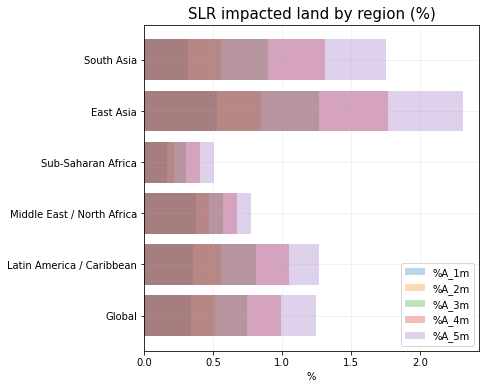

In [6]:
plt.figure(figsize = (6, 6))
plt1 = plt.barh(df1_regional['CN'], df1_regional['%A_1m'], alpha = 0.3)
plt2 = plt.barh(df1_regional['CN'], df1_regional['%A_2m'], alpha = 0.3)
plt3 = plt.barh(df1_regional['CN'], df1_regional['%A_3m'], alpha = 0.3)
plt4 = plt.barh(df1_regional['CN'], df1_regional['%A_4m'], alpha = 0.3)
plt5 = plt.barh(df1_regional['CN'], df1_regional['%A_5m'], alpha = 0.3)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.legend((plt1[0], plt2[0], plt3[0], plt4[0], plt5[0]), ('%A_1m', '%A_2m', '%A_3m', '%A_4m', '%A_5m'))
plt.title("SLR impacted land by region (%)", fontsize = 15)
plt.show()

In [7]:
df1_top10_1m = df1.sort_values(by = '%A_1m', ascending = False).head(10)
df1_top10_1m

,CC,CN,CA,NA_1m,NA_2m,NA_3m,NA_4m,NA_5m,%A_1m,%A_2m,%A_3m,%A_4m,%A_5m
4,BHS,Bahamas,13162,1523,2507,4080,6165,8146,11.571190,19.047257,30.998329,46.839386,61.890290
85,VNM,Vietnam,328535,16977,28090,38860,47080,52926,5.167486,8.550078,11.828268,14.330284,16.109699
36,QAT,Qatar,10973,296,545,856,1168,1454,2.697530,4.966737,7.800966,10.644309,13.250706
5,BLZ,Belize,22290,424,752,1089,1396,1703,1.902198,3.373710,4.885599,6.262898,7.640197
25,PRI,Puerto Rico,8985,147,234,331,432,529,1.636060,2.604341,3.683918,4.808013,5.887590
10,CUB,Cuba,111199,1766,3215,5355,8163,11181,1.588144,2.891213,4.815691,7.340893,10.054947
84,TWN,Taiwan China,36223,574,868,1204,1552,1882,1.584629,2.396268,3.323855,4.284571,5.195594
87,BGD,Bangladesh,136305,2062,3467,6365,11166,17611,1.512784,2.543560,4.669675,8.191923,12.920289
71,DJI,Djibouti,20903,307,331,365,408,460,1.468689,1.583505,1.746161,1.951873,2.200641
19,JAM,Jamaica,11060,147,206,285,377,462,1.329114,1.862568,2.576854,3.408680,4.177215


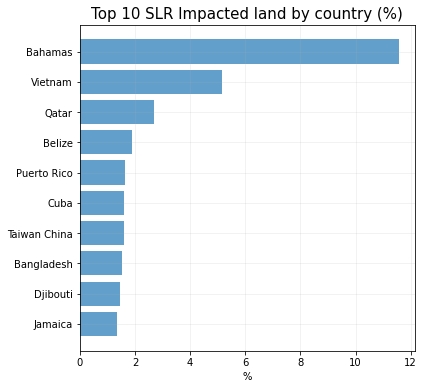

In [8]:
plt.figure(figsize = (6, 6))
plt1 = plt.barh(df1_top10_1m.iloc[::-1]['CN'], df1_top10_1m.iloc[::-1]['%A_1m'], alpha = 0.7)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.title("Top 10 SLR Impacted land by country (%)", fontsize = 15)
plt.show()


## 2. Population

In [9]:
df2.columns = ['CC', 'CN', 'CP', 'NP_1m', 'NP_2m', 'NP_3m', 'NP_4m', 'NP_5m', '%P_1m', '%P_2m', '%P_3m', '%P_4m', '%P_5m']
df2.dropna(how = 'all', inplace = True)
df2 = df2.reset_index(drop = True)
df2.index += 1
df2.head(10)

,CC,CN,CP,NP_1m,NP_2m,NP_3m,NP_4m,NP_5m,%P_1m,%P_2m,%P_3m,%P_4m,%P_5m
1,NaN,Global,4.473279e+09,57222477.0,90811035.0,134545478.0,185950096.0,250595419.0,1.279207,2.030078,3.007760,4.156908,5.602052
2,NaN,Latin America / Caribbean,5.015500e+08,2885928.0,4789715.0,7264534.0,10291790.0,13503335.0,0.575402,0.954983,1.448417,2.051997,2.692321
3,ARG,Argentina,3.703200e+07,199601.0,425596.0,664630.0,944211.0,1271972.0,0.538996,1.149266,1.794745,2.549716,3.434792
4,BHS,"Bahamas, The",3.040000e+05,13869.0,20616.0,32069.0,54722.0,89742.0,4.562171,6.781579,10.549013,18.000658,29.520395
5,BLZ,Belize,2.260000e+05,5532.0,15438.0,23050.0,33676.0,42693.0,2.447788,6.830973,10.199115,14.900885,18.890708
6,BRA,Brazil,1.704060e+08,1026618.0,1710273.0,2692247.0,3969403.0,5296660.0,0.602454,1.003646,1.579902,2.329380,3.108259
7,CHL,Chile,1.521100e+07,39615.0,49111.0,59526.0,71714.0,71714.0,0.260437,0.322865,0.391335,0.471461,0.471461
8,COL,Colombia,4.210500e+07,142888.0,252587.0,385963.0,522346.0,650853.0,0.339361,0.599898,0.916668,1.240580,1.545786
9,CRI,Costa Rica,4.024000e+06,5152.0,7696.0,14387.0,23440.0,43917.0,0.128032,0.191252,0.357530,0.582505,1.091377
10,CUB,Cuba,1.119900e+07,77460.0,122735.0,181608.0,294205.0,427107.0,0.691669,1.095946,1.621645,2.627065,3.813796


In [10]:
df2_regional = df2[df2['CC'].isna()]

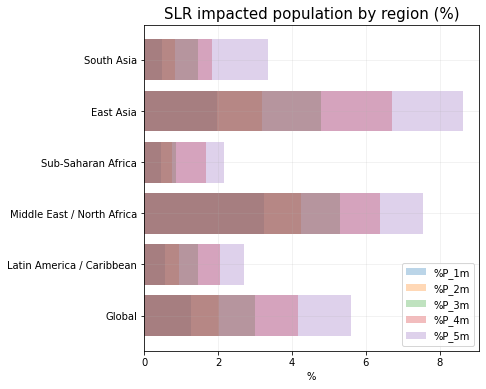

In [11]:
plt.figure(figsize = (6, 6))
plt1 = plt.barh(df2_regional['CN'], df2_regional['%P_1m'], alpha = 0.3)
plt2 = plt.barh(df2_regional['CN'], df2_regional['%P_2m'], alpha = 0.3)
plt3 = plt.barh(df2_regional['CN'], df2_regional['%P_3m'], alpha = 0.3)
plt4 = plt.barh(df2_regional['CN'], df2_regional['%P_4m'], alpha = 0.3)
plt5 = plt.barh(df2_regional['CN'], df2_regional['%P_5m'], alpha = 0.3)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.legend((plt1[0], plt2[0], plt3[0], plt4[0], plt5[0]), ('%P_1m', '%P_2m', '%P_3m', '%P_4m', '%P_5m'))
plt.title("SLR impacted population by region (%)", fontsize = 15)
plt.show()

In [12]:
df2_top10_1m = df2.sort_values(by = '%P_1m', ascending = False).head(10)

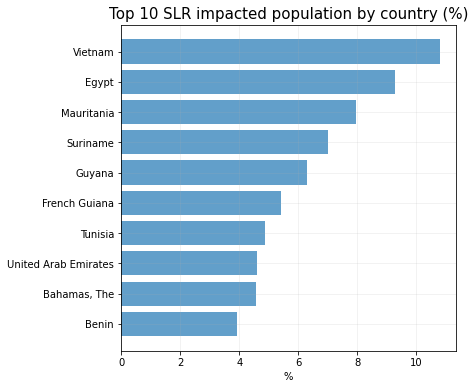

In [13]:
plt.figure(figsize = (6, 6))
plt.barh(df2_top10_1m.iloc[::-1]['CN'], df2_top10_1m.iloc[::-1]['%P_1m'], alpha = 0.7)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.title("Top 10 SLR impacted population by country (%)", fontsize = 15)
plt.show()
a = plt

## 3. GDP

In [14]:
df3.columns = ['CC', 'CN', 'CGDP', 'NGDP_1m', 'NGDP_2m', 'NGDP_3m', 'NGDP_4m', 'NGDP_5m', 
               '%GDP_1m', '%GDP_2m', '%GDP_3m', '%GDP_4m', '%GDP_5m']
df3.dropna(how = 'all', inplace = True)
df3 = df3.reset_index(drop = True)
df3.index += 1
df3 = df3.astype(dict.fromkeys(['CGDP', 'NGDP_1m', 'NGDP_2m', 'NGDP_3m', 'NGDP_4m', 'NGDP_5m'], int))
df3.head(10)

,CC,CN,CGDP,NGDP_1m,NGDP_2m,NGDP_3m,NGDP_4m,NGDP_5m,%GDP_1m,%GDP_2m,%GDP_3m,%GDP_4m,%GDP_5m
1,NaN,Global,16936267,220436,359131,543207,793120,1028627,1.301562,2.120485,3.207360,4.682968,6.073517
2,NaN,Latin America / Caribbean,3649731,19743,36626,49569,67575,87061,0.540944,1.003526,1.358155,1.851506,2.385409
3,ARG,Argentina,439897,1362,3266,6058,8090,10036,0.309618,0.742447,1.377141,1.839067,2.281443
4,BHS,Bahamas,4962,235,397,721,927,1406,4.735994,8.000806,14.530431,18.681983,28.335349
5,BLZ,Belize,1312,27,46,73,104,131,2.057927,3.506098,5.564024,7.926829,9.984756
6,BRA,Brazil,1233633,7134,12432,15036,21623,30176,0.578292,1.007755,1.218839,1.752790,2.446108
7,CHL,Chile,135982,113,151,244,301,301,0.083099,0.111044,0.179436,0.221353,0.221353
8,COL,Colombia,296427,594,1500,2254,3103,3602,0.200387,0.506027,0.760390,1.046801,1.215139
9,CRI,Costa Rica,38381,43,67,113,149,217,0.112035,0.174566,0.294417,0.388213,0.565384
10,CUB,Cuba,19200,86,670,809,999,1236,0.447917,3.489583,4.213542,5.203125,6.437500


In [15]:
df3_regional = df3[df3['CC'].isna()]

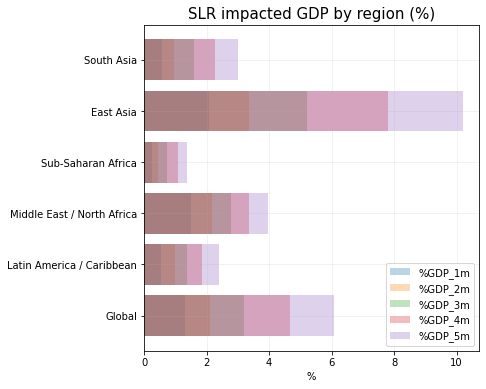

In [16]:
plt.figure(figsize = (6, 6))
plt1 = plt.barh(df3_regional['CN'], df3_regional['%GDP_1m'], alpha = 0.3)
plt2 = plt.barh(df3_regional['CN'], df3_regional['%GDP_2m'], alpha = 0.3)
plt3 = plt.barh(df3_regional['CN'], df3_regional['%GDP_3m'], alpha = 0.3)
plt4 = plt.barh(df3_regional['CN'], df3_regional['%GDP_4m'], alpha = 0.3)
plt5 = plt.barh(df3_regional['CN'], df3_regional['%GDP_5m'], alpha = 0.3)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.legend((plt1[0], plt2[0], plt3[0], plt4[0], plt5[0]), ('%GDP_1m', '%GDP_2m', '%GDP_3m', '%GDP_4m', '%GDP_5m'))
plt.title("SLR impacted GDP by region (%)", fontsize = 15)
plt.show()

In [17]:
df3_top10_1m = df3.sort_values(by = '%GDP_1m', ascending = False).head(10)

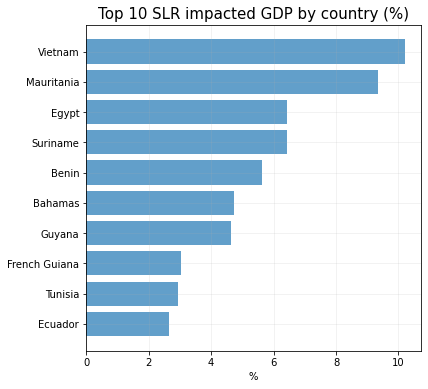

In [18]:
plt.figure(figsize = (6, 6))
plt.barh(df3_top10_1m.iloc[::-1]['CN'], df3_top10_1m.iloc[::-1]['%GDP_1m'], alpha = 0.7)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.title("Top 10 SLR impacted GDP by country (%)", fontsize = 15)
plt.show()

## 4. Agriculture

In [19]:
df4.columns = ['CC', 'CN', 'CAg', 'NAg_1m', 'NAg_2m', 'NAg_3m', 'NAg_4m', 'NAg_5m', 
               '%Ag_1m', '%Ag_2m', '%Ag_3m', '%Ag_4m', '%Ag_5m']
df4.dropna(how = 'all', inplace = True)
df4 = df4.reset_index(drop = True)
df4.index += 1
df4 = df4.astype(dict.fromkeys(['CAg', 'NAg_1m', 'NAg_2m', 'NAg_3m', 'NAg_4m', 'NAg_5m'], int))
df4.head(10)

,CC,CN,CAg,NAg_1m,NAg_2m,NAg_3m,NAg_4m,NAg_5m,%Ag_1m,%Ag_2m,%Ag_3m,%Ag_4m,%Ag_5m
1,NaN,Global,18202873,71621,125302,198048,286947,380965,0.393460,0.688364,1.088004,1.576383,2.092884
2,NaN,Latin America / Caribbean,4889156,16821,30290,47800,67318,87126,0.344047,0.619534,0.977674,1.376884,1.782025
3,ARG,Argentina,119236,4518,8709,13368,17691,22184,3.789124,7.304002,11.211379,14.836962,18.605119
4,BHS,Bahamas,4546,204,387,715,1229,1801,4.487462,8.512978,15.728113,27.034756,39.617246
5,BLZ,Belize,6306,60,161,275,394,534,0.951475,2.553124,4.360926,6.248018,8.468126
6,BRA,Brazil,3182399,2934,5841,10324,15525,20589,0.092195,0.183541,0.324409,0.487840,0.646965
7,CHL,Chile,112139,83,122,193,305,305,0.074015,0.108794,0.172108,0.271984,0.271984
8,COL,Colombia,223156,544,1008,1762,2734,3699,0.243776,0.451702,0.789582,1.225152,1.657585
9,CRI,Costa Rica,13629,25,43,73,135,213,0.183432,0.315504,0.535623,0.990535,1.562844
10,CUB,Cuba,48812,288,519,1108,1921,2838,0.590019,1.063263,2.269934,3.935508,5.814144


In [20]:
df4_regional = df4[df4['CC'].isna()]

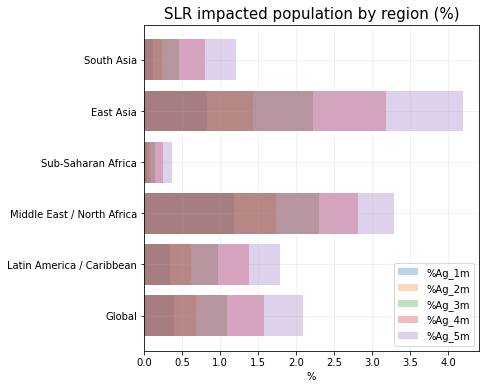

In [21]:
plt.figure(figsize = (6, 6))
plt1 = plt.barh(df4_regional['CN'], df4_regional['%Ag_1m'], alpha = 0.3)
plt2 = plt.barh(df4_regional['CN'], df4_regional['%Ag_2m'], alpha = 0.3)
plt3 = plt.barh(df4_regional['CN'], df4_regional['%Ag_3m'], alpha = 0.3)
plt4 = plt.barh(df4_regional['CN'], df4_regional['%Ag_4m'], alpha = 0.3)
plt5 = plt.barh(df4_regional['CN'], df4_regional['%Ag_5m'], alpha = 0.3)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.legend((plt1[0], plt2[0], plt3[0], plt4[0], plt5[0]), ('%Ag_1m', '%Ag_2m', '%Ag_3m', '%Ag_4m', '%Ag_5m'))
plt.title("SLR impacted population by region (%)", fontsize = 15)
plt.show()

In [22]:
df4_top10_1m = df4.sort_values(by = '%Ag_1m', ascending = False).head(10)

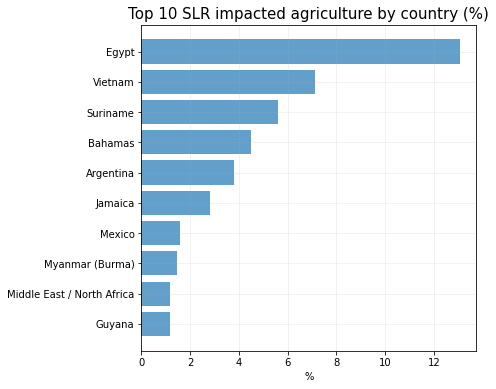

In [23]:
plt.figure(figsize = (6, 6))
plt.barh(df4_top10_1m.iloc[::-1]['CN'], df4_top10_1m.iloc[::-1]['%Ag_1m'], alpha = 0.7)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.title("Top 10 SLR impacted agriculture by country (%)", fontsize = 15)
plt.show()

## 5. UrbanExtent

In [24]:
df5.columns = ['CC', 'CN', 'CU', 'NU_1m', 'NU_2m', 'NU_3m', 'NU_4m', 'NU_5m', 
               '%U_1m', '%U_2m', '%U_3m', '%U_4m', '%U_5m']
df5.dropna(how = 'all', inplace = True)
df5 = df5.reset_index(drop = True)
df5.index += 1
df5 = df5.astype(dict.fromkeys(['CU', 'NU_1m', 'NU_2m', 'NU_3m', 'NU_4m', 'NU_5m'], int))
df5.head(10)

,CC,CN,CU,NU_1m,NU_2m,NU_3m,NU_4m,NU_5m,%U_1m,%U_2m,%U_3m,%U_4m,%U_5m
1,NaN,Global,1439088,14742,23621,35942,50841,67479,1.024399,1.641387,2.497554,3.532862,4.689011
2,NaN,Latin America / Caribbean,505477,3080,5212,8109,11515,15294,0.609325,1.031105,1.604227,2.278046,3.025657
3,ARG,Argentina,57351,212,520,971,1293,1802,0.369654,0.906697,1.693083,2.254538,3.142055
4,BHS,Bahamas,476,19,38,59,114,171,3.991597,7.983193,12.394958,23.949580,35.924370
5,BLZ,Belize,517,7,25,41,66,90,1.353965,4.835590,7.930368,12.765957,17.408124
6,BRA,Brazil,186139,987,1668,2624,3828,5097,0.530249,0.896105,1.409699,2.056528,2.738276
7,CHL,Chile,11043,27,35,43,55,55,0.244499,0.316943,0.389387,0.498053,0.498053
8,COL,Colombia,35595,165,302,444,651,827,0.463548,0.848434,1.247366,1.828909,2.323360
9,CRI,Costa Rica,3098,4,6,13,20,32,0.129116,0.193673,0.419626,0.645578,1.032924
10,CUB,Cuba,9297,37,75,110,190,288,0.397978,0.806712,1.183177,2.043670,3.097773


In [25]:
df5_regional = df5[df5['CC'].isna()]

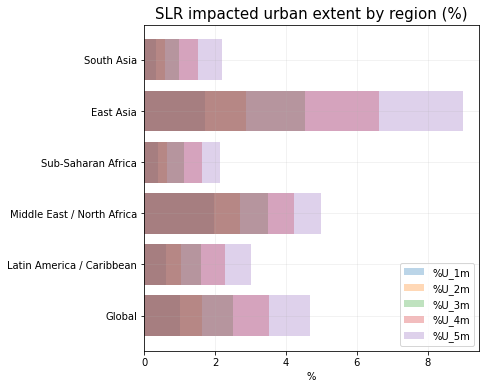

In [26]:
plt.figure(figsize = (6, 6))
plt1 = plt.barh(df5_regional['CN'], df5_regional['%U_1m'], alpha = 0.3)
plt2 = plt.barh(df5_regional['CN'], df5_regional['%U_2m'], alpha = 0.3)
plt3 = plt.barh(df5_regional['CN'], df5_regional['%U_3m'], alpha = 0.3)
plt4 = plt.barh(df5_regional['CN'], df5_regional['%U_4m'], alpha = 0.3)
plt5 = plt.barh(df5_regional['CN'], df5_regional['%U_5m'], alpha = 0.3)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.legend((plt1[0], plt2[0], plt3[0], plt4[0], plt5[0]), ('%U_1m', '%U_2m', '%U_3m', '%U_4m', '%U_5m'))
plt.title("SLR impacted urban extent by region (%)", fontsize = 15)
plt.show()

In [27]:
df5_top10_1m = df5.sort_values(by = '%U_1m', ascending = False).head(10)

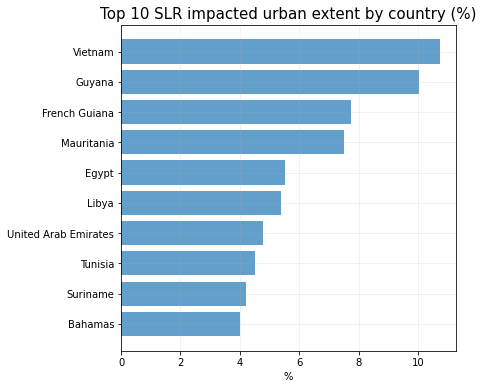

In [28]:
plt.figure(figsize = (6, 6))
plt.barh(df5_top10_1m.iloc[::-1]['CN'], df5_top10_1m.iloc[::-1]['%U_1m'], alpha = 0.7)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.title("Top 10 SLR impacted urban extent by country (%)", fontsize = 15)
plt.show()

## 6. Wetland

In [29]:
df6.columns = ['CC', 'CN', 'CW', 'NW_1m', 'NW_2m', 'NW_3m', 'NW_4m', 'NW_5m', 
               '%W_1m', '%W_2m', '%W_3m', '%W_4m', '%W_5m']
df6.dropna(how = 'all', inplace = True)
df6 = df6.reset_index(drop = True)
df6.index += 1
df6 = df6.astype(dict.fromkeys(['CW', 'NW_1m', 'NW_2m', 'NW_3m', 'NW_4m', 'NW_5m'], int))
df6.head(10)

,CC,CN,CW,NW_1m,NW_2m,NW_3m,NW_4m,NW_5m,%W_1m,%W_2m,%W_3m,%W_4m,%W_5m
1,NaN,Global,4770864,97497,150403,217177,296901,364625,2.043592,3.152532,4.552152,6.223212,7.642746
2,NaN,Latin America / Caribbean,1651735,22956,39438,61562,86575,109378,1.389811,2.387671,3.727111,5.241458,6.622007
3,ARG,Argentina,158918,2287,4607,7357,9590,11526,1.439107,2.898979,4.629432,6.034559,7.252797
4,BHS,"Bahamas, The",5060,898,1402,2238,3251,4000,17.747036,27.707510,44.229249,64.249012,79.051383
5,BLZ,Belize,245,68,93,117,139,164,27.755102,37.959184,47.755102,56.734694,66.938776
6,BRA,Brazil,961242,7370,13710,23396,35450,46736,0.766716,1.426280,2.433934,3.687937,4.862043
7,CHL,Chile,19765,375,483,574,667,667,1.897293,2.443714,2.904123,3.374652,3.374652
8,COL,Colombia,74082,1011,1595,2384,3231,3949,1.364704,2.153020,3.218056,4.361383,5.330580
9,CRI,Costa Rica,6039,63,100,164,258,380,1.043219,1.655903,2.715681,4.272231,6.292433
10,CUB,Cuba,13573,1317,2305,3746,5645,7565,9.703087,16.982244,27.598910,41.589921,55.735652


In [30]:
df6_regional = df6[df6['CC'].isna()]

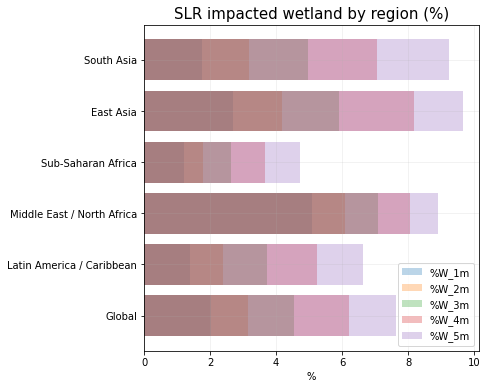

In [31]:
plt.figure(figsize = (6, 6))
plt1 = plt.barh(df6_regional['CN'], df6_regional['%W_1m'], alpha = 0.3)
plt2 = plt.barh(df6_regional['CN'], df6_regional['%W_2m'], alpha = 0.3)
plt3 = plt.barh(df6_regional['CN'], df6_regional['%W_3m'], alpha = 0.3)
plt4 = plt.barh(df6_regional['CN'], df6_regional['%W_4m'], alpha = 0.3)
plt5 = plt.barh(df6_regional['CN'], df6_regional['%W_5m'], alpha = 0.3)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.legend((plt1[0], plt2[0], plt3[0], plt4[0], plt5[0]), ('%W_1m', '%W_2m', '%W_3m', '%W_4m', '%W_5m'))
plt.title("SLR impacted wetland by region (%)", fontsize = 15)
plt.show()

In [32]:
df6_top10_1m = df6.sort_values(by = '%W_1m', ascending = False).head(10)

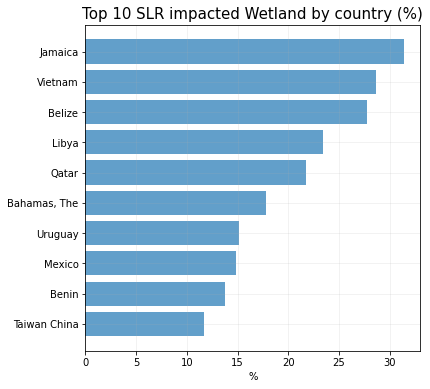

In [33]:
plt.figure(figsize = (6, 6))
plt.barh(df6_top10_1m.iloc[::-1]['CN'], df6_top10_1m.iloc[::-1]['%W_1m'], alpha = 0.7)
plt.xlabel('%')
plt.grid(alpha = 0.2)
plt.title("Top 10 SLR impacted Wetland by country (%)", fontsize = 15)
plt.show()

## Summary

In [34]:
df = pd.concat([df1_regional[['CN', '%A_1m']], df2_regional['%P_1m'], df3_regional['%GDP_1m'],
          df4_regional['%Ag_1m'], df5_regional['%U_1m'], df6_regional['%W_1m'],
          df1_regional['%A_5m'], df2_regional['%P_5m'], df3_regional['%GDP_5m'],
          df4_regional['%Ag_5m'], df5_regional['%U_5m'], df6_regional['%W_5m']], axis=1)

In [35]:
import plotly.graph_objs as go
import plotly.express as ex
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [36]:
from plotly.subplots import make_subplots
fig = make_subplots(rows = 3, cols = 2)
fig.add_trace(go.Bar(
                x=df['CN'],
                y=df['%A_1m'],
                name="%A_1m",
                opacity=0.8),
             row = 1, col = 1)
fig.add_trace(go.Bar(
                x=df['CN'],
                y=df['%A_5m'],
                name="%A_5m",
                opacity=0.8),
             row = 1, col = 2)
fig.add_trace(go.Bar(
                x=df['CN'],
                y=df['%P_1m'],
                name="%P_1m",
                opacity=0.8),
             row = 2, col = 1)
fig.add_trace(go.Bar(
                x=df['CN'],
                y=df['%P_5m'],
                name="%P_5m",
                opacity=0.8),
             row = 2, col = 2)
fig.add_trace(go.Bar(
                x=df['CN'],
                y=df['%GDP_1m'],
                name="%GDP_1m",
                opacity=0.8),
             row = 3, col = 1)
fig.add_trace(go.Bar(
                x=df['CN'],
                y=df['%GDP_5m'],
                name="%GDP_5m",
                opacity=0.8),
             row = 3, col = 2)
fig.update_layout(title_text = "Sea Level Rise 1m & 5m impact summary (%)", title_x=0.5, title_font_size = 22,
                  paper_bgcolor = 'rgb(245, 246, 250)', plot_bgcolor = 'rgb(245, 246, 250)',
                 height = 1200, legend_y = 0.5)

In [37]:
fig = make_subplots(rows = 3, cols = 1)
fig.add_trace(go.Bar(
                y=df1_top10_1m.iloc[::-1]['CN'],
                x=df1_top10_1m.iloc[::-1]['%A_1m'],
                name="%A_1m",
                opacity=0.7,
                orientation='h'),
             row = 1, col = 1)
fig.add_trace(go.Bar(
                y=df2_top10_1m.iloc[::-1]['CN'],
                x=df2_top10_1m.iloc[::-1]['%P_1m'],
                name="%P_1m",
                opacity=0.7,
                orientation='h'),
             row = 2, col = 1)
fig.add_trace(go.Bar(
                y=df3_top10_1m.iloc[::-1]['CN'],
                x=df3_top10_1m.iloc[::-1]['%GDP_1m'],
                name="%GDP_1m",
                opacity=0.7, 
                orientation='h'),
             row = 3, col = 1)
fig.update_layout(title_text = "Top 10 Countries impacted by SLR summary (%)", title_x=0.5, title_font_size = 22,
                  paper_bgcolor = 'rgb(245, 246, 250)', plot_bgcolor = 'rgb(245, 246, 250)',
                  height = 1600, width = 800, legend_y = 0.5)